<img src="../assets/images/science_logo_400x400.jpg" style="width: 150px; float: right;">

# 02 - Programming for `UniProt` (browser/notebook)

## Table of Contents

1. [Introduction](#introduction)
2. [Python imports](#imports)
3. [Running a remote `UniProt` query](#uniprot)
  1. [Connecting to `UniProt`](#connect)
  2. [Constructing a query](#query)
  3. [Perform the query](#search)
  4. [EXAMPLE: Putting it together](#example01)
4. [Advanced queries](#advanced)
  1. [`key:value` queries](#keyvalue)
  2. [Exercise 01](#ex01)
  3. [Combining queries](#combine)
  4. [Exercise 02](#ex02)  
4. [Processing query results](#processing)
  1. [Tabular](#tabular)
  2. [Excel](#excel)  
  3. [FASTA sequence](#fasta)
  4. [`pandas` dataframe](#pandas)

<a id="introduction"></a>
## Introduction

The `UniProt` browser interface is very powerful, but you will have noticed from the previous exercises that even the most complex queries can be converted into a single string that describes the search being made of the `UniProt` databases. Using the browser interface, this string is generated for you, and placed into the search field at the top of the `UniProt` webpage every time you run a search.

<p></p>
<div class="alert-danger">
<b>It can be tedious and time-consuming to point-and-click your way through a large number of browser-based searches, but by using the <code>UniProt</code> <i>webservice</i>, the search strings you've already seen, and a Python module called <code>bioservices</code>, we can compose and run as many searches as we like using a small amount of code, and pull the results of those searches down to our local machines.</b>
</div>

This notebook presents examples of methods for using `UniProt` programmatically, via a *webservice*, and you will be controlling the searches using Python code in this notebook.

There are a number of advantages to this approach:

<p></p>
<div class="alert-success"><b>
    <ul>
        <li> It is easy to set up repeatable searches for many sequences, or collections of sequences
        <li> It is easy to read in the search results and conduct downstream analyses that add value to your search
    </ul>
</b></div>

Where it is not practical to submit a large number of simultaneous queries via a web form (because it is tiresome to point-and-click over and over again), this can be handled programmatically instead. You have the opportunity to change custom options to help refine your query, compared to the website interface. If you need to repeat a query, it can be trivial to apply the same settings every time, if you use a programmatic approach.

<a id="imports"></a>
## Python imports

To use the Python programming language to query `UniProt`, we have to *import* helpful *packages* (collections of Python code that perform specialised tasks.

In [1]:
# Show plots as part of the notebook
%matplotlib inline

# io is a standard library package that lets us manipulate data
import io

# Import Seaborn for graphics and plotting
import seaborn as sns

# Import bioservices module, to run remote UniProt queries
from bioservices import UniProt

# Import Pandas, so we can use dataframes
import pandas as pd

<a id="uniprot"></a>
## Running a remote `UniProt` query

<p></p>
<div class="alert-success">
    <b>There are three key steps to running a remote <code>UniProt</code> query with <code>bioservices</code>:</b>
</div>

1. Make a link to the `UniProt` webservice
2. Construct a query string
3. Send the query to `UniProt`, and catch the result in a *variable*

Once the search result is caught and contained in a *variable*, that *variable* can be processed in any way you like, written to a file, or ignored.

<a id="connect"></a>
### Connecting to `UniProt`

To open a connection to `UniProt`, you make an *instance* of the `UniProt()` *class* from `bioservices`. This can be made to be persistent so that, once a single connection to the database is created, you can interact with it over and over again to make multiple queries. 

<p></p>
<div class="alert-success">
<b>To make a persistent instance, you can assign `UniProt()` to a variable:</b>
</div>

```python
service = UniProt() # it is good practice to have a meaningful variable name
```

<a id="query"></a>
### Constructing a query

<p></p>
<div class="alert-success">
<b>`UniProt` allows for the construction of complex searches by combining *fields*. A full discussion is beyond the scope of this lesson, but you will have seen in <a href="01-uniprot_browser.ipynb">the preceding notebook</a> that the searches you constructed by pointing and clicking on the <code>UniProt</code> website were converted into text in the search field at the top. </b>
</div>

To describe the format briefly: there are a set of defined *keywords* (or *keys*) that indicate the specific type of data you want to search in (such as `host`, `annotation`, or sequence `length`), and these are combined with a particular *value* you want to search for (such as `mouse`, or `40674`) in a `key:value` pair, separated by a colon, such as `host:mouse` or `ec:3.2.1.23`.

* `UniProt` query fields: [http://www.uniprot.org/help/query-fields](http://www.uniprot.org/help/query-fields)

If you provide a string, instead of a `key:value` pair, `UniProt` will search in all *fields* for your search term.

Programmatically, we construct the query as a *string*, e.g.

```python
query = "Q9AJE3"  # this query means we want to look in all fields for Q9AJE3
```

<a id="search"></a>
### Perform the query

To send the query to `UniProt`, you will use the `.search()` *method* of your active *instance* of the `UniProt()` *class*. 

<p></p>
<div class="alert-success">
    <b>If you have assigned your instance to the variable <code>service</code> (as above), then you can run the <code>query</code> string as a remote search with the line:</b>
</div>

```python
result = service.search(query)  # Run a query and catch the output in result
```

In the line above, the output of the search (i.e. your result) is stored in a new variable (created when the search is complete) called `result`. It is good practice to make variable names short and descriptive - this makes your code easier to read.

<a id="example01"></a>
### EXAMPLE: Putting it together

The code in the cell below uses the example code above to create an instance of the `UniProt()` class, and uses it to submit a pre-stored query to the `UniProt` service, then catch the result in a variable called `result`. The `print()` statement then shows us what the result returned by the service looks like.

In [2]:
# Make a link to the UniProt webservice (UniProt())
service = UniProt()

# Build a query string ("Q9AJE3")
query = "Q9AJE3"

# Send the query to UniProt, and catch the search result in a variable (service.search())
result = service.search(query)

# Inspect the result
print(result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
Q9AJE3	CYC2_KITGR	reviewed	Terpentetriene synthase (EC 4.2.3.36)	cyc2	Kitasatospora griseola (Streptomyces griseolosporeus)	311



The `UniProt()` instance defined in the cell above is *persistent*, so you can reuse it to make another query, as in the cell below:

In [3]:
# Make a new query string "Q01844", and run a remote search at UniProt
new_query = "Q01844"
new_result = service.search(new_query)

# Inspect the result
print(new_result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
Q01844	EWS_HUMAN	reviewed	RNA-binding protein EWS (EWS oncogene) (Ewing sarcoma breakpoint region 1 protein)	EWSR1 EWS	Homo sapiens (Human)	656
Q13077	TRAF1_HUMAN	reviewed	TNF receptor-associated factor 1 (Epstein-Barr virus-induced protein 6)	TRAF1 EBI6	Homo sapiens (Human)	416
Q13485	SMAD4_HUMAN	reviewed	Mothers against decapentaplegic homolog 4 (MAD homolog 4) (Mothers against DPP homolog 4) (Deletion target in pancreatic carcinoma 4) (SMAD family member 4) (SMAD 4) (Smad4) (hSMAD4)	SMAD4 DPC4 MADH4	Homo sapiens (Human)	552
P49910	ZN165_HUMAN	reviewed	Zinc finger protein 165 (Cancer/testis antigen 53) (CT53) (LD65) (Zinc finger and SCAN domain-containing protein 7)	ZNF165 ZPF165 ZSCAN7	Homo sapiens (Human)	485
O95486	SC24A_HUMAN	reviewed	Protein transport protein Sec24A (SEC24-related protein A)	SEC24A	Homo sapiens (Human)	1093
Q9NS23	RASF1_HUMAN	reviewed	Ras association domain-containing protein 1	RASSF1 RDA32	Homo sa

<a id="advanced"></a>
## Advanced queries

<p></p>
<div class="alert-success">
<b>The examples above built queries that were simple strings. They did not exploit the <code>key:value</code> search structure, or combine search terms. In this section, you will explore some queries that use the <code>UniProt</code> query fields, and combine them into powerful, filtering searches.</b>
</div>

<a id="keyvalue"></a>
### `key:value` queries

As noted above (and at [http://www.uniprot.org/help/query-fields](http://www.uniprot.org/help/query-fields)) particular values of specific data can be requested by using `key:value` pairs to restrict searches to named *fields* in the `UniProt` database.

As a first example, you will note that the result returned for the query `"Q01844"` has multiple entries. Only one of these is the sequence with `accession` value equal to `"Q01844"`, but the other entries make reference to this sequence somewhere in their database record. If we want to restrict our result only to the particular entry `"Q01844"`, we can specify the field we want to search as `accession`, and build the following query:

```python
query = "accession:Q01844"  # specify a search on the accession field
```

Note that we can use the same variable name `query` as earlier (this overwrites the previous value in `query`). The code below runs the search and shows the output:

In [4]:
# Make a new query string ("accession:Q01844"), and run a remote search at UniProt
query = "accession:Q01844"
result = service.search(query)

# Inspect the result
print(result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
Q01844	EWS_HUMAN	reviewed	RNA-binding protein EWS (EWS oncogene) (Ewing sarcoma breakpoint region 1 protein)	EWSR1 EWS	Homo sapiens (Human)	656



<div class="alert-success">
    <b>By using this and other <code>key:value</code> constructions, we can refine our searches to give us only the entries we're interested in</b>
</div>

<img src="../assets/images/exercise.png" style="width: 100px; float: left;">

<a id="ex01"></a>
### Exercise 01 (10min)

Using `key:value` searches, can you find and download sets of entries for proteins that satisfy the following requirements? (**HINT:** this <a href="http://www.uniprot.org/help/query-fields">link</a> to the `UniProt` query fields may be helpful, here):

<p></p>
<div class="alert-danger">
<ul>
<li> Have publications authored by someone with the surname Broadhurst
<li> Have protein length between 9000aa and 9010aa
<li> Derive from the taipan snake
<li> Have been found in the wing
</ul>
</div>

In [5]:
# SOLUTION - EXERCISE 01
query = "citation:(author:broadhurst)"
result = service.search(query)
print(result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
P0AFG6	ODO2_ECOLI	reviewed	Dihydrolipoyllysine-residue succinyltransferase component of 2-oxoglutarate dehydrogenase complex (EC 2.3.1.61) (2-oxoglutarate dehydrogenase complex component E2) (OGDC-E2) (Dihydrolipoamide succinyltransferase component of 2-oxoglutarate dehydrogenase complex)	sucB b0727 JW0716	Escherichia coli (strain K12)	405
Q03132	ERYA2_SACER	reviewed	6-deoxyerythronolide-B synthase EryA2, modules 3 and 4 (DEBS 2) (EC 2.3.1.94) (6-deoxyerythronolide B synthase II) (Erythronolide synthase) (ORF B)	eryA	Saccharopolyspora erythraea (Streptomyces erythraeus)	3567
Q32NN2	QKIA_XENLA	reviewed	Protein quaking-A (Xqua)	qki-a	Xenopus laevis (African clawed frog)	341
P83917	CBX1_MOUSE	reviewed	Chromobox protein homolog 1 (Heterochromatin protein 1 homolog beta) (HP1 beta) (Heterochromatin protein p25) (M31) (Modifier 1 protein)	Cbx1 Cbx	Mus musculus (Mouse)	185
P63159	HMGB1_RAT	reviewed	High mobility group protein B1

In [6]:
# SOLUTION - EXERCISE 01
query = "length:[9000 TO 9010]"
result = service.search(query)
print(result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
A0A6I8THK6	A0A6I8THK6_AEDAE	unreviewed	Uncharacterized protein	5576237	Aedes aegypti (Yellowfever mosquito) (Culex aegypti)	9004
A0A6I8TS24	A0A6I8TS24_AEDAE	unreviewed	Uncharacterized protein	5576237	Aedes aegypti (Yellowfever mosquito) (Culex aegypti)	9005
A0A6I8TS57	A0A6I8TS57_AEDAE	unreviewed	Uncharacterized protein	5576237	Aedes aegypti (Yellowfever mosquito) (Culex aegypti)	9003
A0A6I8TU04	A0A6I8TU04_AEDAE	unreviewed	Uncharacterized protein	5576237	Aedes aegypti (Yellowfever mosquito) (Culex aegypti)	9007
A0A6I8TR55	A0A6I8TR55_AEDAE	unreviewed	Uncharacterized protein	5576237	Aedes aegypti (Yellowfever mosquito) (Culex aegypti)	9003
A0A6I8TSG5	A0A6I8TSG5_AEDAE	unreviewed	Uncharacterized protein	5576237	Aedes aegypti (Yellowfever mosquito) (Culex aegypti)	9000
A0A541B7M6	A0A541B7M6_9NOCA	unreviewed	Mycobactin synthetase protein B (Phenyloxazoline synthase MbtB)	FK531_14655	Rhodococcus sp. C9-5	9001
A0A0Q9WY93	A0A0Q9WY9

In [7]:
# SOLUTION - EXERCISE 01
query = "organism:taipan"
result = service.search(query)
print(result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
P00614	PA2TA_OXYSC	reviewed	Basic phospholipase A2 taipoxin alpha chain (svPLA2) (EC 3.1.1.4) (Phosphatidylcholine 2-acylhydrolase)		Oxyuranus scutellatus scutellatus (Australian taipan) (Coastal taipan)	119
Q45Z47	PA22_OXYSC	reviewed	Phospholipase A2 OS2 (PLA2) (EC 3.1.1.4) (Phosphatidylcholine 2-acylhydrolase)		Oxyuranus scutellatus scutellatus (Australian taipan) (Coastal taipan)	146
P00615	PA2TB_OXYSC	reviewed	Neutral phospholipase A2 homolog taipoxin beta chain 1 (svPLA2 homolog)		Oxyuranus scutellatus scutellatus (Australian taipan) (Coastal taipan)	145
P00616	PA2TG_OXYSC	reviewed	Acidic phospholipase A2 homolog taipoxin gamma chain (svPLA2 homolog)		Oxyuranus scutellatus scutellatus (Australian taipan) (Coastal taipan)	152
B7S4N9	VKT_OXYSC	reviewed	Kunitz-type serine protease inhibitor taicotoxin (Taicatoxin, serine protease inhibitor component) (TCX) (TSPI) (Venom protease inhibitor 1) (Venom protease inhibitor 2)

In [8]:
# SOLUTION - EXERCISE 01
query = 'annotation:(type:"tissue specificity" wing)'
result = service.search(query)
print(result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
Q26366	VG_DROME	reviewed	Protein vestigial	vg CG3830	Drosophila melanogaster (Fruit fly)	453
Q9NBK5	TRC_DROME	reviewed	Serine/threonine-protein kinase tricornered (EC 2.7.11.1) (NDR protein kinase) (Serine/threonine-protein kinase 38-like) (Serine/threonine-protein kinase tricorner)	trc CG8637	Drosophila melanogaster (Fruit fly)	463
Q9V9J3	SRC42_DROME	reviewed	Tyrosine-protein kinase Src42A (EC 2.7.10.2) (Tyrosine-protein kinase Src41) (Dsrc41)	Src42A Src41 TK5 CG44128	Drosophila melanogaster (Fruit fly)	517
Q9VMD9	TIG_DROME	reviewed	Tiggrin	Tig CG11527	Drosophila melanogaster (Fruit fly)	2188
P22265	TSH_DROME	reviewed	Protein teashirt	tsh CG1374	Drosophila melanogaster (Fruit fly)	954
P30052	SCAL_DROME	reviewed	Protein scalloped	sd CG8544	Drosophila melanogaster (Fruit fly)	440
Q9VT04	PATH_DROME	reviewed	Proton-coupled amino acid transporter-like protein pathetic	path CG3424	Drosophila melanogaster (Fruit fly)	471
Q95ST2

<a id="combine"></a>
### Combining queries

<p></p>
<div class="alert-success">
    <b>Combining terms in a <code>UniProt</code> query can be as straightforward as putting them in the same string, separated by a space.</b>
</div>

For example:

```python
query = "organism:rabbit tissue:eye"
```

will search for all entries deriving from rabbits that are found in the eye

In [9]:
# Combine queries for rabbit (organism) and eye (tissue), and search
query = "organism:rabbit tissue:eye"
result = service.search(query)
print(result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
Q866N2	MYOC_RABIT	reviewed	Myocilin (Trabecular meshwork-induced glucocorticoid response protein) [Cleaved into: Myocilin, N-terminal fragment (Myocilin 20 kDa N-terminal fragment); Myocilin, C-terminal fragment (Myocilin 35 kDa N-terminal fragment)]	MYOC TIGR	Oryctolagus cuniculus (Rabbit)	490
P41316	CRYAB_RABIT	reviewed	Alpha-crystallin B chain (Alpha(B)-crystallin)	CRYAB	Oryctolagus cuniculus (Rabbit)	175
P14755	CRYL1_RABIT	reviewed	Lambda-crystallin (EC 1.1.1.45) (L-gulonate 3-dehydrogenase) (Gul3DH)	CRYL1 GUL3DH	Oryctolagus cuniculus (Rabbit)	319
A4L9J0	MIP_RABIT	reviewed	Lens fiber major intrinsic protein (Aquaporin-0)	MIP	Oryctolagus cuniculus (Rabbit)	263
Q9TV70	DHDH_RABIT	reviewed	Trans-1,2-dihydrobenzene-1,2-diol dehydrogenase (EC 1.3.1.20) (D-xylose 1-dehydrogenase) (D-xylose-NADP dehydrogenase) (EC 1.1.1.179) (Dimeric dihydrodiol dehydrogenase) (Ory2DD) (Fragment)	DHDH 2DD	Oryctolagus cuniculus (Rabbit)	329
P5

<img src="../assets/images/exercise.png" style="width: 100px; float: left;">

<a id="ex02"></a>
### Exercise 02 (10min)

Using `key:value` searches, can you find and download sets of entries for proteins that satisfy the following requirements? (**HINT:** this <a href="http://www.uniprot.org/help/query-fields">link</a> to the `UniProt` query fields may be helpful, here):

<p></p>
<div class="alert-danger">
<ul>
<li> Found in sheep spleen
<li> Have "rxlr" in their name, have a publication with author name Pritchard, and are between 70aa and 80aa in length
<li> Derive from a quokka and have had their annotations manually reviewed
<li> Are found in cell membranes of horse heart tissue, and have had their annotations manually reviewed
</ul>
</div>

In [10]:
# SOLUTION - EXERCISE 02
query = "name:rxlr author:pritchard length:[70 TO 80]"
result = service.search(query)
print(result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
D0NZW3	D0NZW3_PHYIT	unreviewed	Secreted RxLR effector peptide protein, putative	PITG_23154	Phytophthora infestans (strain T30-4) (Potato late blight fungus)	79
D0NKZ7	D0NKZ7_PHYIT	unreviewed	Secreted RxLR effector peptide protein, putative	PITG_22972	Phytophthora infestans (strain T30-4) (Potato late blight fungus)	76
D0NPQ2	D0NPQ2_PHYIT	unreviewed	Secreted RxLR effector peptide protein, putative	PITG_23016	Phytophthora infestans (strain T30-4) (Potato late blight fungus)	77
D0NNG1	D0NNG1_PHYIT	unreviewed	Secreted RxLR effector peptide protein, putative	PITG_23011	Phytophthora infestans (strain T30-4) (Potato late blight fungus)	74
D0N526	D0N526_PHYIT	unreviewed	Secreted RxLR effector peptide protein, putative	PITG_22802	Phytophthora infestans (strain T30-4) (Potato late blight fungus)	74
D0RM37	D0RM37_PHYIT	unreviewed	Secreted RxLR effector peptide protein, putative (Fragment)	PITG_23230	Phytophthora infestans (strain T3

In [11]:
# SOLUTION - EXERCISE 02
query = "organism:quokka AND reviewed:yes"
result = service.search(query)
print(result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
P67840	HSP1_SETBR	reviewed	Sperm protamine P1	PRM1	Setonix brachyurus (Quokka)	61



In [12]:
# SOLUTION - EXERCISE 02
query = 'organism:horse annotation:(type:"tissue specificity" heart) locations:(location:membrane) reviewed:yes'
result = service.search(query)
print(result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
Q2EEY0	TLR9_HORSE	reviewed	Toll-like receptor 9 (CD antigen CD289)	TLR9	Equus caballus (Horse)	1031



<a id="boolean"></a>
### Combining terms with Boolean logic

Boolean logic allows you to combine search terms with each other in arbitrary ways using three *operators*, specifying whether:

* both terms are required (`AND`) **NOTE:** this is implicitly what you have been doing in the examples above
* either term is allowed (`OR`)
* a term is disallowed (`NOT`)

Searches are read from left-to right, but the logic of a search can be controlled by placing the combinations you want to resolve first in parentheses (`()`). Combining these operators can build some extremely powerful searches. For example, to get all proteins from horses and sheep, identified in the ovary, and having length greater than 200aa, you could use the query:

```
query = "tissue:ovary AND (organism:sheep OR organism:horse) NOT length:[1 TO 200]"
```

<a id="processing"></a>
## Processing query results

So far you have worked with the default output from `bioservices`, although you know from [the previous notebook](01-uniprot_browser.ipynb) that `UniProt` can provide output in a number of useful formats for searches in the browser.

The default output is `tabular`, and gives a good idea of the nature and content of the entries you recover. In this section, you will see some ways to download search results in alternative formats, which can be useful for analysis.

All the output format options are controlled in a similar way, using the `frmt=<format>` argument when you conduct your search - with `<format>` being one of the allowed terms (see the [`bioservices` documentation](https://pythonhosted.org/bioservices/references.html#module-bioservices.uniprot) for a full list.

<a id="tabular"></a>
### Tabular

<p></p>
<div class="alert-success">
<b>The default datatype is the most flexible datatype for download: <i>tabular</i>.</b>
</div>

This can be specified explicitly with the `tab` format:

```python
result = service.search(query, frmt="tab")
```

In [13]:
# Make a query string ("Q01844"), and run a remote search at UniProt,
# getting the result as tabular format (frmt="tab")
query = "Q01844"
result = service.search(query, frmt="tab")

# Inspect the result
print(result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
Q01844	EWS_HUMAN	reviewed	RNA-binding protein EWS (EWS oncogene) (Ewing sarcoma breakpoint region 1 protein)	EWSR1 EWS	Homo sapiens (Human)	656
Q13077	TRAF1_HUMAN	reviewed	TNF receptor-associated factor 1 (Epstein-Barr virus-induced protein 6)	TRAF1 EBI6	Homo sapiens (Human)	416
Q13485	SMAD4_HUMAN	reviewed	Mothers against decapentaplegic homolog 4 (MAD homolog 4) (Mothers against DPP homolog 4) (Deletion target in pancreatic carcinoma 4) (SMAD family member 4) (SMAD 4) (Smad4) (hSMAD4)	SMAD4 DPC4 MADH4	Homo sapiens (Human)	552
P49910	ZN165_HUMAN	reviewed	Zinc finger protein 165 (Cancer/testis antigen 53) (CT53) (LD65) (Zinc finger and SCAN domain-containing protein 7)	ZNF165 ZPF165 ZSCAN7	Homo sapiens (Human)	485
O95486	SC24A_HUMAN	reviewed	Protein transport protein Sec24A (SEC24-related protein A)	SEC24A	Homo sapiens (Human)	1093
Q9NS23	RASF1_HUMAN	reviewed	Ras association domain-containing protein 1	RASSF1 RDA32	Homo sa

By default, the columns that are returned are: `Entry`, `Entry name`, `Status`, `Protein names`, `Gene names`, `Organism`, and `Length`. But these can be modified by passing the `columns=<list>` argument, where the `<list>` is a comma-separated list of column names. For example:

```python
columnlist = "id,entry name,length,organism,mass,domains,domain,pathway"
result = service.search(query, frmt="tab", columns=columnlist)
```

The list of allowed column names can be found by inspecting the content of the variable `service._valid_columns`.

In [14]:
# Make a query string ("Q01844")
query = "Q01844"

# Define a list of columns we want to retrive
columnlist = "id,entry name,length,mass,go(cellular component)"

# Run the remote search (columns=columnlist)
result = service.search(query, columns=columnlist)

# View the result
print(result)

Entry	Entry name	Length	Mass	Gene ontology (cellular component)
Q01844	EWS_HUMAN	656	68,478	cytoplasm [GO:0005737]; nucleolus [GO:0005730]; nucleoplasm [GO:0005654]; nucleus [GO:0005634]; plasma membrane [GO:0005886]
Q13077	TRAF1_HUMAN	416	46,164	cytoplasm [GO:0005737]; cytoplasmic side of plasma membrane [GO:0009898]; cytosol [GO:0005829]
Q13485	SMAD4_HUMAN	552	60,439	activin responsive factor complex [GO:0032444]; centrosome [GO:0005813]; cytoplasm [GO:0005737]; cytosol [GO:0005829]; heteromeric SMAD protein complex [GO:0071144]; nuclear chromatin [GO:0000790]; nucleoplasm [GO:0005654]; nucleus [GO:0005634]; SMAD protein complex [GO:0071141]; transcription regulator complex [GO:0005667]
P49910	ZN165_HUMAN	485	55,771	nucleus [GO:0005634]
O95486	SC24A_HUMAN	1093	119,749	COPII vesicle coat [GO:0030127]; cytosol [GO:0005829]; endoplasmic reticulum exit site [GO:0070971]; endoplasmic reticulum membrane [GO:0005789]; ER to Golgi transport vesicle membrane [GO:0012507]; Golgi membrane [GO:0

#### Converting to a dataframe

<p></p>
<div class="alert-success">
    <b>The <code>pandas</code> module allows us to process tabular data into dataframes, just like in <code>R</code>.</b>
</div>

To do this, we have to use the `io.StringIO()` class to make it think that our downloaded results are a file

```python
df = pd.read_table(io.StringIO(result))
```

In [15]:
# Convert the last search result into a dataframe in Pandas
df = pd.read_table(io.StringIO(result))

# View the dataframe
df

,Entry,Entry name,Length,Mass,Gene ontology (cellular component)
0,Q01844,EWS_HUMAN,656,"68,478",cytoplasm [GO:0005737]; nucleolus [GO:0005730]...
1,Q13077,TRAF1_HUMAN,416,"46,164",cytoplasm [GO:0005737]; cytoplasmic side of pl...
2,Q13485,SMAD4_HUMAN,552,"60,439",activin responsive factor complex [GO:0032444]...
3,P49910,ZN165_HUMAN,485,"55,771",nucleus [GO:0005634]
4,O95486,SC24A_HUMAN,1093,"119,749",COPII vesicle coat [GO:0030127]; cytosol [GO:0...
5,Q9NS23,RASF1_HUMAN,344,"39,219",cytoplasm [GO:0005737]; microtubule [GO:000587...
6,Q12933,TRAF2_HUMAN,501,"55,859",CD40 receptor complex [GO:0035631]; cell corte...
7,Q92734,TFG_HUMAN,400,"43,448",cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...
8,O94855,SC24D_HUMAN,1032,"113,010",COPII vesicle coat [GO:0030127]; cytosol [GO:0...
9,P35637,FUS_HUMAN,526,"53,426",dendritic spine head [GO:0044327]; nucleoplasm...


Doing this will produce a `pandas` dataframe that can be manipulated and analysed just like any other dataframe. We can, for instance, view a histogram of sequence lengths from the table above:

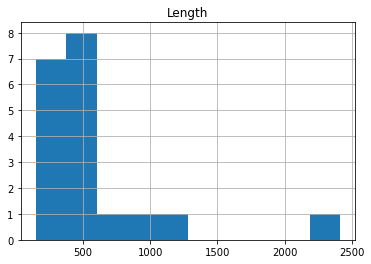

In [16]:
# Plot histogram of protein sequence lengths from dataframe
df.hist();

<a id="excel"></a>
### Excel

<p></p>
<div class="alert-success">
    <b>You can download Excel spreadsheets directly from <code>UniProt</code>, just as with the browser interface.</b>
</div>

```python
result = service.search(query, frmt="xls")
```

You can't use the Excel output directly in your code without some file manipulation, and you'll have to save it to a file, as in the example below. Also, the downloaded format is not guaranteed to be current for your version of Excel, and the application may ask to repair it. But, if you want Excel output to share with/display to others, you can get it programmatically.

<p></p>
<div class="alert-danger">
<b>NOTE: the downloaded format is actually `.xlsx`, rather than `.xls` which is implied by the format</b>
</div>

In [17]:
# Make a query string, and run a remote search at UniProt,
# getting the result as an Excel spreadsheer
query = "Q01844"
result = service.search(query, frmt="xls")

# Write the Excel spreadsheet to file
outfile = '../assets/downloads/Q01844.xlsx'
with open(outfile, 'wb') as ofh:
    ofh.write(result)

<a id="fasta"></a>
### FASTA sequence

<p></p>
<div class="alert-success">
<b>If you're interested only in the FASTA format sequence for an entry, you can use the <code>fasta</code> option with <code>frmt</code> to recover the sequences directly, as in the example below:</b>
</div>

In [18]:
# Make a query string, and run a remote search at UniProt,
# getting the result as FASTA sequence
query = "go:membrane organism:horse tissue:heart reviewed:yes"
result = service.search(query, frmt="fasta")

# Inspect the result
print(result)

>sp|P27104|ANF_HORSE Natriuretic peptides A OS=Equus caballus OX=9796 GN=NPPA PE=2 SV=1
MGSFSTIMASFLLFLAFQLQGQTRANPVYGSVSNGDLMDFKNLLDRLEDKMPLEDEVMPP
QVLSDQSEEERAALSPLPEVPPWTGEVNPAQRDGGALGRGSWDSSDRSALLKSKLRALLA
APRSLRRSSCFGGRMDRIGAQSGLGCNSFRYRR



<a id="pandas"></a>
### `pandas` dataframe

<p></p>
<div class="alert-success">
    <b>In addition to the conversion of tabular output to a <code>pandas</code> dataframe above, you can ask the <code>UniProt()</code> instance to return a <code>pandas</code> dataframe directly, with the <code>.get_df()</code> method.</b>
</div>

```python
result = service.get_df(query)
```

However, this is slow compared to the other methods above and can take a long time for queries with thousands of results

In [19]:
# Get a dataframe for all venom proteins from snakes (or mambas, if "snake" is not in the annotation)
df = service.get_df('tissue:venom (organism:viper OR organism:mamba)', limit=None)

# View the dataframe
df.head()

WARNING [bioservices:UniProt]:  column could not be parsed. Subcellular location


,Entry,Entry name,Gene names,Gene names (primary ),Gene names (synonym ),Gene names (ordered locus ),Gene names (ORF ),Organism,Organism ID,Protein names,...,Taxonomic lineage IDs (GENUS),Taxonomic lineage IDs (SUBGENUS),Taxonomic lineage IDs (SPECIES GROUP),Taxonomic lineage IDs (SPECIES SUBGROUP),Taxonomic lineage IDs (SPECIES),Taxonomic lineage IDs (SUBSPECIES),Taxonomic lineage IDs (VARIETAS),Taxonomic lineage IDs (FORMA),Cross-reference (db_abbrev),Cross-reference (EMBL)
0,P0DKR6,3SX1_DENPO,[],NaN,NaN,NaN,NaN,Dendroaspis polylepis polylepis (Black mamba),8620,Mambalgin-1 (Mamb-1) (Pi-Dp1),...,8617,NaN,NaN,NaN,8624.0,NaN,NaN,NaN,NaN,JX428743;
1,P00981,VKTHK_DENPO,[],NaN,NaN,NaN,NaN,Dendroaspis polylepis polylepis (Black mamba),8620,Kunitz-type serine protease inhibitor homolog ...,...,8617,NaN,NaN,NaN,8624.0,NaN,NaN,NaN,NaN,S61886;
2,P0C1Z0,3SE2_DENAN,[],NaN,NaN,NaN,NaN,Dendroaspis angusticeps (Eastern green mamba) ...,8618,Fasciculin-2 (Fas-2) (Fas2) (Acetylcholinester...,...,8617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P0C6E8,VM3G1_TRIGA,[],NaN,NaN,NaN,NaN,Trimeresurus gramineus (Bamboo pit viper) (Ind...,8767,Zinc metalloproteinase/disintegrin [Cleaved in...,...,8764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P85092,3SI1A_DENAN,[],NaN,NaN,NaN,NaN,Dendroaspis angusticeps (Eastern green mamba) ...,8618,Toxin AdTx1 (Rho-elapitoxin-Da1a) (Rho-Da1a) (...,...,8617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This dataframe works like any other dataframe. You can get a complete list of returned columns:

In [20]:
print(list(df.columns))

['Entry', 'Entry name', 'Gene names', 'Gene names  (primary )', 'Gene names  (synonym )', 'Gene names  (ordered locus )', 'Gene names  (ORF )', 'Organism', 'Organism ID', 'Protein names', 'Proteomes', 'Taxonomic lineage (ALL)', 'Taxonomic lineage IDs', 'Virus hosts', 'Sequence', 'Length', 'Mass', 'Gene encoded by', 'Alternative products (isoforms)', 'Erroneous gene model prediction', 'Erroneous initiation', 'Erroneous termination', 'Erroneous translation', 'Frameshift', 'Mass spectrometry', 'Polymorphism', 'RNA editing', 'Sequence caution', 'Alternative sequence', 'Natural variant', 'Non-adjacent residues', 'Non-standard residue', 'Non-terminal residue', 'Sequence conflict', 'Sequence uncertainty', 'Version (sequence)', 'Domains', 'Domain count', 'Domain [CC]', 'Sequence similarities', 'Coiled coil', 'Compositional bias', 'Domain [FT]', 'Motif', 'Region', 'Repeat', 'Zinc finger', 'EC number', 'Absorption', 'Catalytic activity', 'Cofactor', 'General annotation (ENZYME REGULATION)', 'Fun

Or, for instance, the number of rows and columns in the results:

In [21]:
print(df.shape)

(1128, 179)


and use the convenient features of a dataframe, such as built-in plotting:

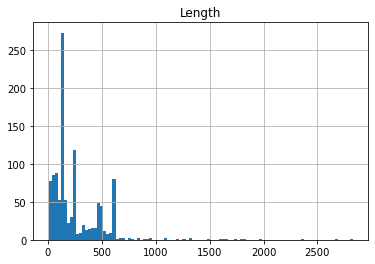

In [22]:
# Construct a histogram of returned sequence lengths
df.hist('Length', bins=100);

and grouping/subsetting:

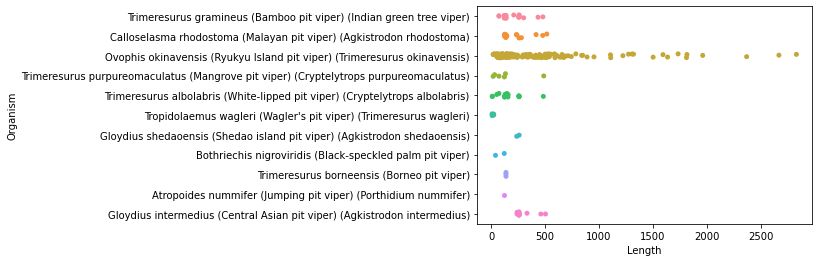

In [23]:
# Subset out pit vipers
coral = df.loc[df["Organism"].str.contains("pit viper")]
coral.head()

# Plot a strip plot of sequence size by organism in the dataframe
output = sns.stripplot(y="Organism", x="Length",
                       data=coral)  # Render strip plot

<img src="../assets/images/exercise.png" style="width: 100px; float: left;">

<a id="ex03"></a>
### Exercise 03 (10min)

Can you use `bioservices`, `UniProt` and `pandas` to:

<br />
<p></p>
<div class="alert-danger"><b>
    <ul>
        <li> download a dataframe for all proteins that have "rxlr" in their name
        <li> render a violin plot (<code>sns.violinplot()</code>) that shows the distribution of protein lengths grouped according to the evidence for the protein
    </ul>
</b></div>

WARNING [bioservices:UniProt]:  column could not be parsed. Subcellular location


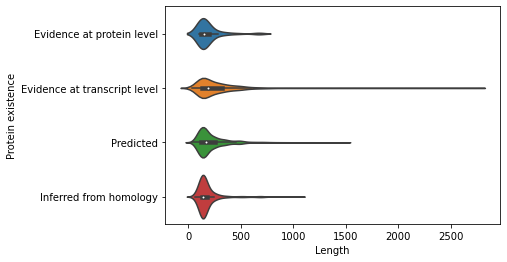

In [24]:
# SOLUTION - EXERCISE 03

# Get dataframe
df = service.get_df("name:rxlr", limit=None)

# Draw violin plot
output = sns.violinplot(y="Protein existence", x="Length", data=df)

# Profit